In [4]:
#import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [5]:
#import require model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#df = dataframe, I use cardiovascular disease dataset
df = pd.read_csv('cardio_train.csv', sep=';')

In [7]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
#drop id column because i dont need it
df.drop(df.columns[0], inplace=True, axis=1)

In [9]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
#change age column to year
df['age'] = df['age'].apply(lambda x : x/365)

In [11]:
#change float to int for age
df['age'] = df['age'].astype(int)

In [12]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [13]:
#check null values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [14]:
sb.set_style('whitegrid')

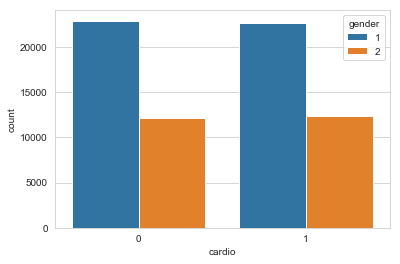

In [15]:
#check people who has the disease or not by gender
sb.countplot( data = df, x = 'cardio', hue='gender')

In [16]:
#set X and y to train the model
X = df.drop('cardio', axis=1)
y = df['cardio']

In [17]:
#I use train test split for cross validation, set test size to 30% of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
#from sklearn.tree
dt_model = KNeighborsClassifier()

In [19]:
#training...
dt_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
#get prediction
prediction = dt_model.predict(X_test)

In [21]:
#it come with ndarray (non dimensional array)
type(prediction)

numpy.ndarray

In [22]:
#accuracy score for the model
dt_model.score(X_test, y_test)

0.6895714285714286

In [23]:
print(classification_report(y_test, prediction))
#print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70     10563
           1       0.69      0.67      0.68     10437

   micro avg       0.69      0.69      0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000

